# Linear Models

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeOp-tech/DA-ML-regression-predictive/master/datasets/scores_synth.csv?token=AHM3F3AXEA6FMNHMZGL3TH3APGLKC")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


Text(0.5, 0, 'income (in 1k euros)')

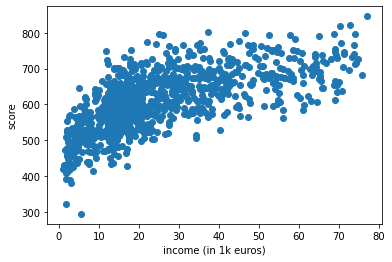

In [74]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

#### Cross validation

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [76]:
pd.concat([X_train,y_train],axis=1)

,income,score
529,32.969951,651.533089
817,10.390175,508.754831
785,31.046529,658.628103
448,15.565252,630.845425
272,17.638121,665.883017
...,...,...
734,27.418432,543.457980
48,2.753050,389.284897
933,4.009164,534.540681
44,4.401732,441.403563


In [77]:
pd.concat([X_test,y_test],axis=1)

,income,score
566,7.750278,467.822304
93,20.524021,528.574973
429,5.170637,495.140852
646,27.149281,715.154507
902,14.549653,502.058216
...,...,...
228,15.073813,680.539884
788,0.893344,420.668986
521,41.127580,686.023948
293,13.178657,544.461675


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


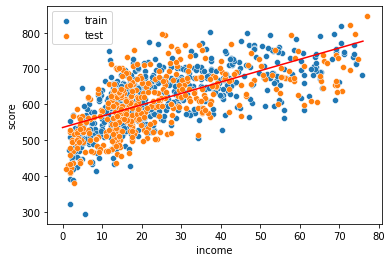

In [79]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

#### MSE: mean squared error

In [80]:
from sklearn.metrics import mean_squared_error

In [91]:
lr.predict(X_test)
losses = {}
losses['Linear'] = mean_squared_error(y_test, lr.predict(X_test))
print(losses)

{'Linear': 3629.8118544246036}


## Polynomials

In [92]:
data['income2'] = data['income']**2
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2']], data['score'], test_size=0.4, shuffle=True)

In [93]:
pd.concat([X_train,y_train],axis=1)

,income,income2,score
131,19.584829,383.565528,560.367942
46,13.146981,172.843116,541.023708
756,60.307094,3636.945607,720.240809
168,15.037194,226.117210,516.093354
455,43.316732,1876.339278,658.680411
...,...,...,...
923,15.072393,227.177022,652.226021
13,41.446994,1717.853301,683.616638
292,31.405856,986.327777,666.393475
165,14.131907,199.710809,550.267339


In [94]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
lr.predict(X_test)
losses['Linear: polynomial2'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


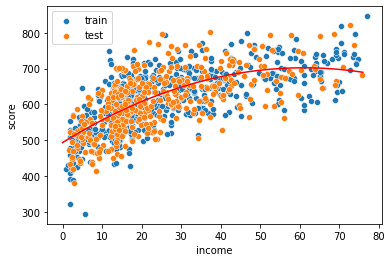

In [88]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

Linear  :  3629.8118544246036
Linear: polynomial2  :  3710.15888793321
Linear: polynomial3  :  3233.065746895295


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


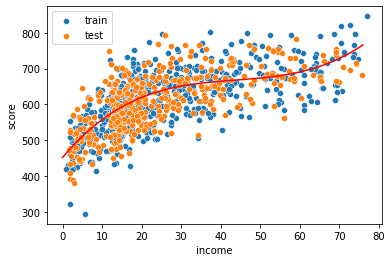

In [99]:
data['income3'] = data['income']**3
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2','income3']], data['score'], test_size=0.4, shuffle=True)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

losses['Linear: polynomial3'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)
    
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2) + lr.coef_[2]*(x_range**3)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

# Nonlinear Models

So far we've only seen linear models, but there are many different families of models in Machine Learning. Some of them are:
- Distance/clustering methods: K-Nearest-Neighbors (KNN).
- Kernel methods: Support Vector Machines (SVM).
- Decision-tree-based methods: Decision trees, random forests...
- Gradient-boosting methods: XGBoost, LightGBM, CatBoost...
- Neural networks


We will skip the first two because, even they are used in some contexts, their usage has become less and less frequent as gradient-boosting methods and neural networks have been beating them at virtually every task. However, in order to understand gradient-boosting methods we first need to understand decision-tree methods.

## Tree

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [113]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor()
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor()

In [114]:
losses['Tree'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295
Tree  :  6573.027443038072
Tree: max2  :  3535.17457744465


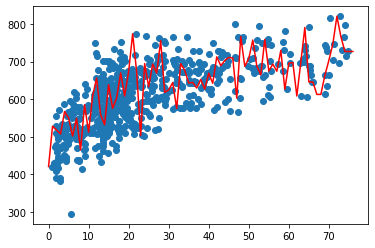

In [115]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart.predict(x_range), color='r')

In [116]:
cart = DecisionTreeRegressor(max_depth=2)
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor(max_depth=2)

In [117]:
losses['Tree: max2'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295
Tree  :  6573.027443038072
Tree: max2  :  3535.17457744465


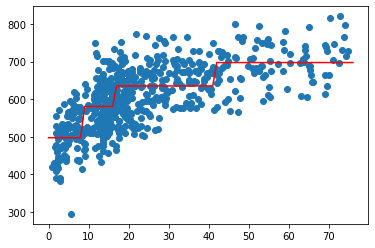

In [118]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart.predict(x_range), color='r')

## Random Forest
Pleas read about [hypterparameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
losses['Random Forest'] = mean_squared_error(y_test, rf.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295
Tree  :  6573.027443038072
Tree: max2  :  3535.17457744465
Random Forest  :  4953.346665339272


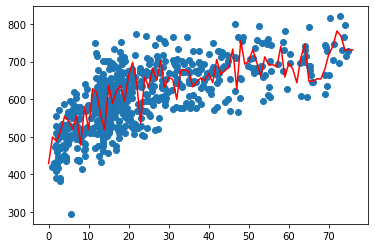

In [122]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [124]:
losses['Random Forest: max2'] = mean_squared_error(y_test, rf.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295
Tree  :  6573.027443038072
Tree: max2  :  3535.17457744465
Random Forest  :  4953.346665339272
Random Forest: max2  :  3335.780298691387


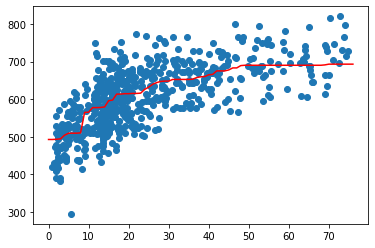

In [125]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

## XGBoost

In [127]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
losses['XGBoost'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3629.8118544246036
Linear: polynomial2  :  3233.065746895295
Linear: polynomial3  :  3233.065746895295
Tree  :  6573.027443038072
Tree: max2  :  3535.17457744465
Random Forest  :  4953.346665339272
Random Forest: max2  :  4744.49792267776
XGBoost  :  4744.49792267776


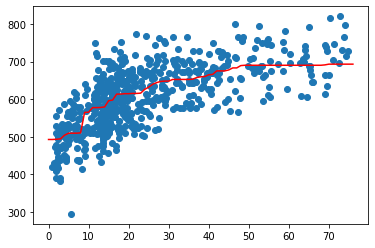

In [129]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')